In [110]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [111]:
def _2nodes(dt, npoints, f, a, g):

    fsamp = 1 / dt
    times = np.arange(npoints)

    r_vec = dt * np.random.uniform(0, 1000, (2, npoints))
    theta_vec = dt * np.random.uniform(0, 1000, (2, npoints))

    omega = 2 * np.pi * f

    for t in tqdm(range(npoints - 1)):
        # Node 1
        theta_vec[0, t + 1] = theta_vec[0, t] + dt * (
            omega
            + g * r_vec[1, t] / r_vec[0, t] * np.sin(theta_vec[1, t] - theta_vec[0, t])
        )

        r_vec[0, t + 1] = r_vec[0, t] + dt * (
            (a - g - r_vec[0, t] ** 2) * r_vec[0, t]
            + g * r_vec[1, t] * np.cos(theta_vec[1, t] - theta_vec[0, t])
        )

        # Node 2
        theta_vec[1, t + 1] = theta_vec[1, t] + dt * (
            omega
            + g * r_vec[0, t] / r_vec[1, t] * np.sin(theta_vec[0, t] - theta_vec[1, t])
        )

        r_vec[1, t + 1] = r_vec[1, t] + dt * (
            (a - g - r_vec[1, t] ** 2) * r_vec[1, t]
            + g * r_vec[0, t] * np.cos(theta_vec[0, t] - theta_vec[1, t])
        )

    return theta_vec, r_vec

In [112]:
theta, r = _2nodes(1e-3, 10000, 2, 5, 1)

100%|███████████████████████████████████| 9999/9999 [00:00<00:00, 254648.62it/s]


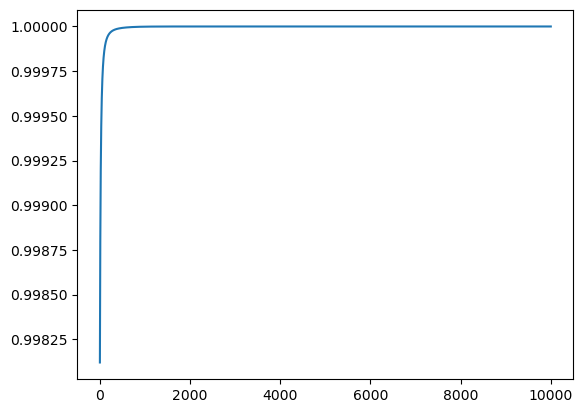

In [115]:
plt.plot(np.cos(theta[0] - theta[1]))

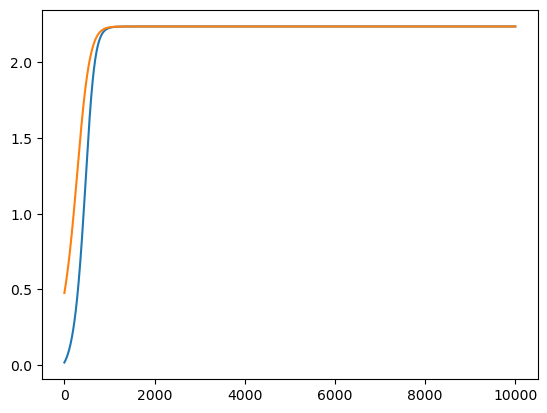

In [114]:
plt.plot(r[0])
plt.plot(r[1])